## Dataset overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
%matplotlib inline

data = pd.read_csv("AmesHousing.tsv", delimiter="\t")

In [2]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Define initial functions

In [3]:
def transform_features(df):
    return df

In [4]:
def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

In [5]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    numeric_train = train.select_dtypes(include = ["integer", "float"])
    numeric_test = test.select_dtypes(include = ["integer", "float"])
    features = numeric_train.columns.drop("SalePrice")
    
    lr = LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    test_predictions = lr.predict(test[features])
    rmse = np.sqrt(mean_squared_error(test["SalePrice"], test_predictions))
    
    return rmse

## Feature engineering
### - Drop columns with missing value amount higher than 5%

In [6]:
num_isnull = data.isnull().sum()
num_isnull.sort_values()

Order                 0
Sale Condition        0
Heating QC            0
Central Air           0
1st Flr SF            0
2nd Flr SF            0
Low Qual Fin SF       0
Gr Liv Area           0
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
Foundation            0
TotRms AbvGrd         0
Fireplaces            0
Paved Drive           0
Wood Deck SF          0
Open Porch SF         0
Enclosed Porch        0
3Ssn Porch            0
Screen Porch          0
Pool Area             0
Misc Val              0
Mo Sold               0
Yr Sold               0
Sale Type             0
Functional            0
Exter Cond            0
Heating               0
                   ... 
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Electrical            1
BsmtFin SF 1          1
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Garage Cars           1
Garage Area           1
Bsmt Half Bath  

In [7]:
larger_isnull = num_isnull[num_isnull > 0.05*len(data)].sort_values()
larger_isnull

Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Lot Frontage      490
Fireplace Qu     1422
Fence            2358
Alley            2732
Misc Feature     2824
Pool QC          2917
dtype: int64

In [8]:
data = data.drop(larger_isnull.index, axis=1)
data.isnull().sum().value_counts().sort_values()

83     1
81     1
23     2
2      2
80     3
1      7
0     55
dtype: int64

### - Drop text columns with missing values

In [9]:
text_isnull = data.select_dtypes(include=["object"]).isnull().sum()
text_isnull.sort_values()

MS Zoning          0
Paved Drive        0
Functional         0
Kitchen Qual       0
Central Air        0
Heating QC         0
Heating            0
Foundation         0
Exter Cond         0
Exter Qual         0
Sale Type          0
Exterior 2nd       0
Exterior 1st       0
Sale Condition     0
Roof Style         0
House Style        0
Bldg Type          0
Condition 2        0
Condition 1        0
Neighborhood       0
Street             0
Lot Shape          0
Land Contour       0
Roof Matl          0
Land Slope         0
Lot Config         0
Utilities          0
Electrical         1
Mas Vnr Type      23
Bsmt Cond         80
Bsmt Qual         80
BsmtFin Type 1    80
BsmtFin Type 2    81
Bsmt Exposure     83
dtype: int64

In [10]:
larger_text_isnull = text_isnull[text_isnull > 0].index.sort_values(ascending=False)
data = data.drop(larger_text_isnull, axis=1)
data.isnull().sum().value_counts()

0     55
1      6
2      2
23     1
dtype: int64

### - For numerical columns, fill the missing values with the most popular value of the column

In [11]:
num_isnull_new = data.select_dtypes(["integer","float"]).isnull().sum()
num_isnull_new.sort_values()

Order               0
Mo Sold             0
Misc Val            0
Pool Area           0
Screen Porch        0
3Ssn Porch          0
Enclosed Porch      0
Open Porch SF       0
Wood Deck SF        0
Fireplaces          0
TotRms AbvGrd       0
Kitchen AbvGr       0
Bedroom AbvGr       0
Half Bath           0
Full Bath           0
Yr Sold             0
SalePrice           0
MS SubClass         0
Low Qual Fin SF     0
2nd Flr SF          0
1st Flr SF          0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Lot Area            0
Gr Liv Area         0
PID                 0
Garage Area         1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
BsmtFin SF 1        1
Garage Cars         1
Bsmt Full Bath      2
Bsmt Half Bath      2
Mas Vnr Area       23
dtype: int64

In [12]:
num_missing = num_isnull_new[num_isnull_new > 0].index
num_missing

Index(['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars',
       'Garage Area'],
      dtype='object')

In [13]:
replacement_dict = data[num_missing].mode().to_dict(orient="records")[0]
replacement_dict

{'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Mas Vnr Area': 0.0,
 'Total Bsmt SF': 0.0}

In [14]:
data = data.fillna(replacement_dict)
data.isnull().sum().value_counts()

0    64
dtype: int64

### - Create better features

In [15]:
years_sold = data["Yr Sold"] - data["Year Built"]
year_sold_bad = years_sold[years_sold < 0]
year_sold_bad

2180   -1
dtype: int64

In [16]:
years_until_remod = data["Yr Sold"] - data["Year Remod/Add"]
year_until_remod_bad = years_until_remod[years_until_remod < 0]
year_until_remod_bad

1702   -1
2180   -2
2181   -1
dtype: int64

In [17]:
row_removed = []
for i in year_sold_bad.index:
    for j in year_until_remod_bad.index:
        if i != j:
            row_removed.append(j)
        if i == j:
            row_removed.append(i)

In [18]:
data = data.drop(row_removed, axis=0)

### - Drop useless columns for machine learning

In [19]:
data = data.drop(["PID", "Order"], axis=1)
data = data.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

## Update functions

In [20]:
def transform_features(df):
    num_isnull = df.isnull().sum()
    larger_isnull = num_isnull[num_isnull > 0.05*len(df)].sort_values()
    df = df.drop(larger_isnull.index, axis=1)
    
    text_isnull = df.select_dtypes(include=["object"]).isnull().sum()
    larger_text_isnull = text_isnull[text_isnull > 0].index.sort_values(ascending=False)
    df = df.drop(larger_text_isnull, axis=1)
    
    num_isnull_new = df.select_dtypes(["integer","float"]).isnull().sum()
    num_missing = num_isnull_new[num_isnull_new > 0].index
    replacement_dict = df[num_missing].mode().to_dict(orient="records")[0]
    df = df.fillna(replacement_dict)
    
    years_sold = df["Yr Sold"] - df["Year Built"]
    year_sold_bad = years_sold[years_sold < 0]
    years_until_remod = df["Yr Sold"] - df["Year Remod/Add"]
    year_until_remod_bad = years_until_remod[years_until_remod < 0]
    row_removed = []
    for i in year_sold_bad.index:
        for j in year_until_remod_bad.index:
            if i != j:
                row_removed.append(j)
            if i == j:
                row_removed.append(i)
    df = df.drop(row_removed, axis=0)
    
    df = df.drop(["PID", "Order"], axis=1)
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    return df

In [21]:
def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

In [22]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    numeric_train = train.select_dtypes(include = ["integer", "float"])
    numeric_test = test.select_dtypes(include = ["integer", "float"])
    features = numeric_train.columns.drop("SalePrice")
    
    lr = LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    test_predictions = lr.predict(test[features])
    rmse = np.sqrt(mean_squared_error(test["SalePrice"], test_predictions))
    
    return rmse

In [23]:
data = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_data = transform_features(data)
filtered_data = select_features(transform_data)
rmse = train_and_test(filtered_data)

rmse

55275.367312413066

## Correlation matrix

In [24]:
transform_data.corr()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
MS SubClass,1.000000,-0.204638,0.040285,-0.067498,0.036924,0.043740,0.005502,-0.058276,-0.070936,-0.129873,...,-0.045453,-0.102769,-0.016283,-0.013309,-0.022963,-0.037988,-0.050696,-0.003451,-0.024356,-0.085128
Lot Area,-0.204638,1.000000,0.090426,-0.033487,0.019977,0.018488,0.114982,0.180192,0.084454,0.020899,...,0.176283,0.207487,0.152849,0.089202,0.023004,0.016619,0.056135,0.094421,0.038013,0.267520
Overall Qual,0.040285,0.090426,1.000000,-0.093907,0.596404,0.568942,0.418972,0.278274,-0.040551,0.268760,...,0.598485,0.561303,0.253120,0.290553,-0.139907,0.018537,0.042412,0.030638,-0.027685,0.801206
Overall Cond,-0.067498,-0.033487,-0.093907,1.000000,-0.368471,0.048319,-0.132071,-0.050143,0.040846,-0.136758,...,-0.181083,-0.153249,0.021046,-0.067152,0.071287,0.043804,0.043915,-0.016822,0.047066,-0.101540
Year Built,0.036924,0.019977,0.596404,-0.368471,1.000000,0.611549,0.305963,0.279569,-0.026990,0.127840,...,0.536465,0.479752,0.228135,0.194882,-0.374223,0.015941,-0.041119,0.002291,-0.028024,0.558490
Year Remod/Add,0.043740,0.018488,0.568942,0.048319,0.611549,1.000000,0.189846,0.150011,-0.061631,0.164044,...,0.424706,0.374299,0.217017,0.239191,-0.220124,0.037560,-0.046584,-0.011343,-0.018245,0.533007
Mas Vnr Area,0.005502,0.114982,0.418972,-0.132071,0.305963,0.189846,1.000000,0.284305,-0.014139,0.087535,...,0.354753,0.365786,0.158743,0.123395,-0.109775,0.014689,0.068366,0.005143,-0.022884,0.506983
BsmtFin SF 1,-0.058276,0.180192,0.278274,-0.050143,0.279569,0.150011,0.284305,1.000000,-0.053656,-0.487829,...,0.252932,0.303824,0.216577,0.105248,-0.100343,0.051644,0.098336,0.085531,0.015748,0.439284
BsmtFin SF 2,-0.070936,0.084454,-0.040551,0.040846,-0.026990,-0.061631,-0.014139,-0.053656,1.000000,-0.238304,...,-0.014052,0.004265,0.099212,-0.003918,0.032310,-0.023347,0.062897,0.044386,-0.002650,0.006127
Bsmt Unf SF,-0.129873,0.020899,0.268760,-0.136758,0.127840,0.164044,0.087535,-0.487829,-0.238304,1.000000,...,0.178816,0.162749,-0.040532,0.113352,0.006913,-0.005256,-0.047593,-0.031912,-0.026767,0.182751


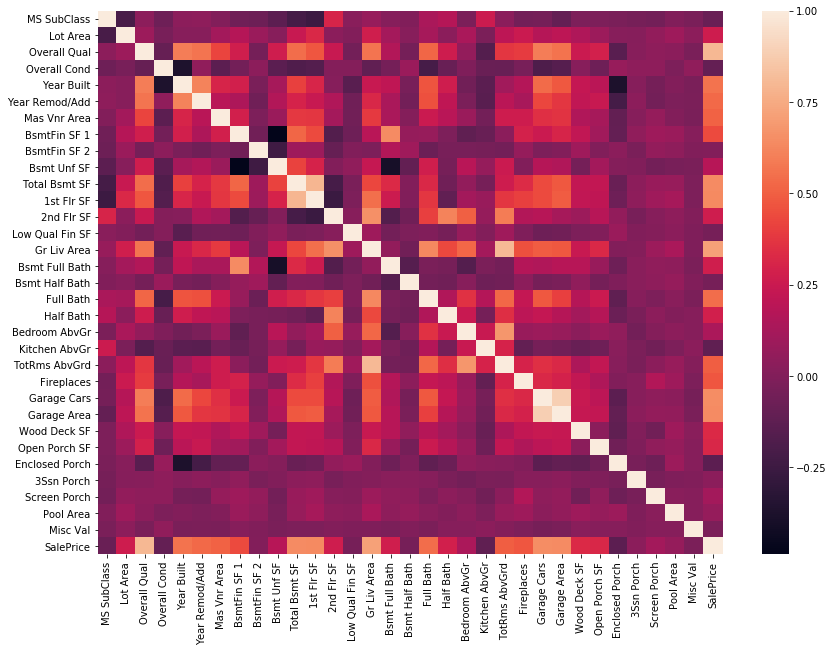

In [25]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(transform_data.corr())

## Find the features with higher correlation

In [26]:
numerical_data = transform_data.select_dtypes(include=["integer","float"])

In [27]:
corr_saleprice = transform_data.corr()["SalePrice"].abs().sort_values(ascending=False)
corr_saleprice

SalePrice          1.000000
Overall Qual       0.801206
Gr Liv Area        0.717596
Garage Cars        0.648361
Total Bsmt SF      0.644012
Garage Area        0.641425
1st Flr SF         0.635185
Year Built         0.558490
Full Bath          0.546118
Year Remod/Add     0.533007
Mas Vnr Area       0.506983
TotRms AbvGrd      0.498574
Fireplaces         0.474831
BsmtFin SF 1       0.439284
Wood Deck SF       0.328183
Open Porch SF      0.316262
Half Bath          0.284871
Bsmt Full Bath     0.276258
2nd Flr SF         0.269601
Lot Area           0.267520
Bsmt Unf SF        0.182751
Bedroom AbvGr      0.143916
Enclosed Porch     0.128685
Kitchen AbvGr      0.119760
Screen Porch       0.112280
Overall Cond       0.101540
MS SubClass        0.085128
Pool Area          0.068438
Low Qual Fin SF    0.037629
Bsmt Half Bath     0.035875
3Ssn Porch         0.032268
Misc Val           0.019273
BsmtFin SF 2       0.006127
Name: SalePrice, dtype: float64

In [28]:
high_corr_saleprice = corr_saleprice[corr_saleprice > 0.4]
high_corr_saleprice

SalePrice         1.000000
Overall Qual      0.801206
Gr Liv Area       0.717596
Garage Cars       0.648361
Total Bsmt SF     0.644012
Garage Area       0.641425
1st Flr SF        0.635185
Year Built        0.558490
Full Bath         0.546118
Year Remod/Add    0.533007
Mas Vnr Area      0.506983
TotRms AbvGrd     0.498574
Fireplaces        0.474831
BsmtFin SF 1      0.439284
Name: SalePrice, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

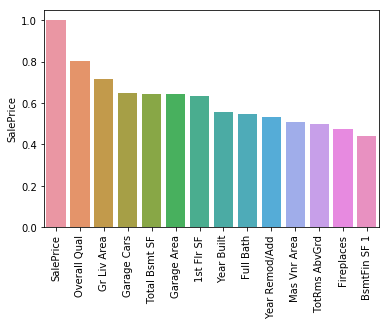

In [29]:
fig2, ax2 = plt.subplots()
sns.barplot(x=high_corr_saleprice.index, y=high_corr_saleprice)
plt.xticks(rotation=90)

## Select the nominal features within acceptable unique value count

In [30]:
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

transform_cat_cols = []

for col in nominal_features:
    if col in transform_data.columns:
        transform_cat_cols.append(col)

transform_cat_cols

['MS SubClass',
 'MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [31]:
unique_count = transform_data[transform_cat_cols].apply(lambda x: len(x.unique())).sort_values()
unique_count

Central Air      2
Street           2
Land Contour     4
Lot Config       5
Bldg Type        5
Heating          6
Roof Style       6
Foundation       6
MS Zoning        7
Condition 2      8
House Style      8
Roof Matl        8
Condition 1      9
Exterior 1st    16
MS SubClass     16
Exterior 2nd    17
Neighborhood    28
dtype: int64

In [32]:
transform_data = transform_data.drop(unique_count[unique_count > 10].index, axis=1)

In [33]:
unique_count2 = transform_data.select_dtypes(include=["object"]).apply(lambda x: len(x.unique())).sort_values()
unique_count2

Street          2
Central Air     2
Paved Drive     3
Utilities       3
Land Slope      3
Lot Shape       4
Land Contour    4
Exter Qual      4
Lot Config      5
Kitchen Qual    5
Bldg Type       5
Heating QC      5
Exter Cond      5
Roof Style      6
Heating         6
Foundation      6
MS Zoning       7
Functional      8
Condition 2     8
Roof Matl       8
House Style     8
Condition 1     9
dtype: int64

## Change the text features into categorical features

In [34]:
text_cols = transform_data.select_dtypes(include=["object"])
for col in text_cols:
    transform_data[col] = transform_data[col].astype("category")

In [35]:
transform_data = pd.concat([transform_data, pd.get_dummies(transform_data.select_dtypes(include=["category"]))], axis=1)

## Update functions

In [36]:
def transform_features(df):
    num_isnull = df.isnull().sum()
    larger_isnull = num_isnull[num_isnull > 0.05*len(df)].sort_values()
    df = df.drop(larger_isnull.index, axis=1)
    
    text_isnull = df.select_dtypes(include=["object"]).isnull().sum()
    larger_text_isnull = text_isnull[text_isnull > 0].index.sort_values(ascending=False)
    df = df.drop(larger_text_isnull, axis=1)
    
    num_isnull_new = df.select_dtypes(["integer","float"]).isnull().sum()
    num_missing = num_isnull_new[num_isnull_new > 0].index
    replacement_dict = df[num_missing].mode().to_dict(orient="records")[0]
    df = df.fillna(replacement_dict)
    
    years_sold = df["Yr Sold"] - df["Year Built"]
    year_sold_bad = years_sold[years_sold < 0]
    years_until_remod = df["Yr Sold"] - df["Year Remod/Add"]
    year_until_remod_bad = years_until_remod[years_until_remod < 0]
    row_removed = []
    for i in year_sold_bad.index:
        for j in year_until_remod_bad.index:
            if i != j:
                row_removed.append(j)
            if i == j:
                row_removed.append(i)
    df = df.drop(row_removed, axis=0)
    
    df = df.drop(["PID", "Order"], axis=1)
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    
    text_cols = transform_data.select_dtypes(include=["object"])
    for col in text_cols:
        transform_data[col] = transform_data[col].astype("category")
    return df

In [37]:
def select_features(df, corr_threshold=0.4, uniq_threshold=10):
    numerical_data = df.select_dtypes(include=["integer","float"])
    corr_saleprice = df.corr()["SalePrice"].abs().sort_values(ascending=False)
    high_corr_saleprice = corr_saleprice[corr_saleprice > 0.4]
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

    df_cat_cols = []

    for col in nominal_features:
        if col in df.columns:
            df_cat_cols.append(col)
            
    unique_count = df[df_cat_cols].apply(lambda x: len(x.unique())).sort_values()
    df = df.drop(unique_count[unique_count > 10].index, axis=1)
    
    text_cols = df.select_dtypes(include=["object"])
    for col in text_cols:
        df[col] = df[col].astype("category")
        
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=["category"]))], axis=1)
    
    return df

In [38]:
def train_and_test(df, k):
    numeric_df = df.select_dtypes(include = ["integer", "float"])
    features = numeric_df.columns.drop("SalePrice")
    lr = LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        lr.fit(train[features], train["SalePrice"])
        test_predictions = lr.predict(test[features])
        rmse = np.sqrt(mean_squared_error(test["SalePrice"], test_predictions))
        return rmse
        
    if k == 1:
        shuffled_index = np.random.permutation(len(df))
        shuffled_df = df.iloc[shuffled_index]
        fold_one = shuffled_df[:1460]
        fold_two = shuffled_df[1460:]
        
        lr.fit(fold_one[features], fold_one["SalePrice"])
        predictions_1 = lr.predict(fold_two[features])
        rmse1 = np.sqrt(mean_squared_error(fold_two["SalePrice"], predictions_1))
        
        lr.fit(fold_two[features], fold_two["SalePrice"])
        predictions_2 = lr.predict(fold_one[features])
        rmse2 = np.sqrt(mean_squared_error(fold_one["SalePrice"], predictions_2))
        rmse_avg = np.mean(rmse1 + rmse2)
        return rmse_avg
        
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            
            lr.fit(train[features], train["SalePrice"])
            test_predictions = lr.predict(test[features])
            rmse = np.sqrt(mean_squared_error(test["SalePrice"], test_predictions))
            rmse_values.append(rmse)
            
        avg_rmse = np.mean(rmse_values)
        return avg_rmse
        

In [39]:
data = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_data = transform_features(data)
filtered_data = select_features(transform_data)
rmse = train_and_test(filtered_data, k=4)

rmse

29094.109432201705